## Project 4 Maxwell Boltzmann Distribution

Due Wed Nov 24, 9am

In [1]:
# Main code and animation here
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import combinations
from IPython.display import HTML

# Constants
r = 0.0015  # particle radius in m
m = 2.672e-26  # particle mass in kg
v_0 = 500.  # initial velocity in m/s
k_B = 1.38e-23  # Boltzmann constant

# Animation parameters
npoint = 400
nframe = 500
xmin, xmax, ymin, ymax = 0, 1, 0, 1
Dt = 0.00002


def update_point(n):
    """
    This function calculates the motion of the particles every 2 time
    steps.

    n is the number of frames.

    This function updates the points every 2 time steps. It adds the
    change in position, checks if the particle is at the border, and
    checks if the particles are close enought to collide. If the particle
    is at the border, the particle's velocity is reversed. If two particles
    are within 4r^2 of each other, then the indices of the combinations are
    taken. A combination of indices for the npoint number of points is also
    made. The indices are then used to determine which of the combination of
    the npoint indices are colliding. This array of tuples is then sent to
    another function to have the collision calculations done."""
    global x, y, v_x, v_y
    print(".", end="")
    for i in range(2):
        dx = Dt * v_x
        dy = Dt * v_y
        x = x + dx
        y = y + dy
        indx = np.where((x < xmin) | (x > xmax))
        indy = np.where((y < ymin) | (y > ymax))
        v_x[indx] = -v_x[indx]
        v_y[indy] = -v_y[indy]

        # Distances between particles
        xx = np.asarray(list(combinations(x, 2)))
        yy = np.asarray(list(combinations(y, 2)))
        dd = (xx[:, 0] - xx[:, 1]) ** 2 + (yy[:, 0] - yy[:, 1]) ** 2
        # Combination indices for colliding particles
        indices = np.where((dd < 4 * r ** 2))[0]

        # Creating combinations of various points
        combin = np.asarray(list(combinations(np.arange(0, npoint), 2)))
        collision(combin[indices], dd[indices])
    data = np.stack((x, y), axis=-1)
    im.set_offsets(data)


def collision(c, d):
    """
    This function calculates the resultant velocities of an array of colliding
    particles.

    c is an array of tuples representing the indices.
    d is an array of distances.

    This function takes the array of tuples c and splits it to provide the
    indices of particle 1 and 2 for each collision, represented by the amount
    of tuples in c. From this, dx, dy, dv_x, dv_y, and the dot product are
    computed for each collision. From there, the components of the velocities
    are computed by subtracting the original velocity component by the product
    of the component of the difference between the two position vectors and
    the quotient of the dot product and the distance, d, between the two
    particles. This is done for every collision at the same time. The
    velocity array is modified in place.
    """
    global x, y, v_x, v_y
    col_index_a = c[:, 0]  # particle 1 indices
    col_index_b = c[:, 1]  # particle 2 indices

    dx = x[col_index_a] - x[col_index_b]
    dy = y[col_index_a] - y[col_index_b]
    dvx = v_x[col_index_a] - v_x[col_index_b]
    dvy = v_y[col_index_a] - v_y[col_index_b]
    dot = dvx*dx + dvy*dy

    v_x[col_index_a] = v_x[col_index_a] - dot / d*dx
    v_y[col_index_a] = v_y[col_index_a] - dot / d*dy
    v_x[col_index_b] = v_x[col_index_b] + dot / d*dx
    v_x[col_index_b] = v_x[col_index_b] + dot / d*dy


fig, ax = plt.subplots()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Set initial positions and velocities
x = np.random.random(npoint)
y = np.random.random(npoint)
v_x = -v_0*np.ones(npoint)
v_y = np.zeros(npoint)
v_x[np.where(x <= 0.5)] = -v_x[np.where(x <= 0.5)]
v_y[np.where(y <= 0.5)] = -v_y[np.where(y <= 0.5)]

# Colours right-hand points red
col = np.where(v_x == -v_0, 'r', np.where(v_x == v_0, 'b', x))

im = ax.scatter(x, y, c=col)
im.set_sizes([20])

anim = animation.FuncAnimation(fig, update_point, nframe, interval=30,
                               repeat=False)

anim.save('collide.webm', extra_args=['-vcodec', 'libvpx'])
plt.close()

HTML('<video controls autoplay><source src="collide.webm"' +
     'type="video/webm"></video>')

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

The temperature of the gas is 359.4 K


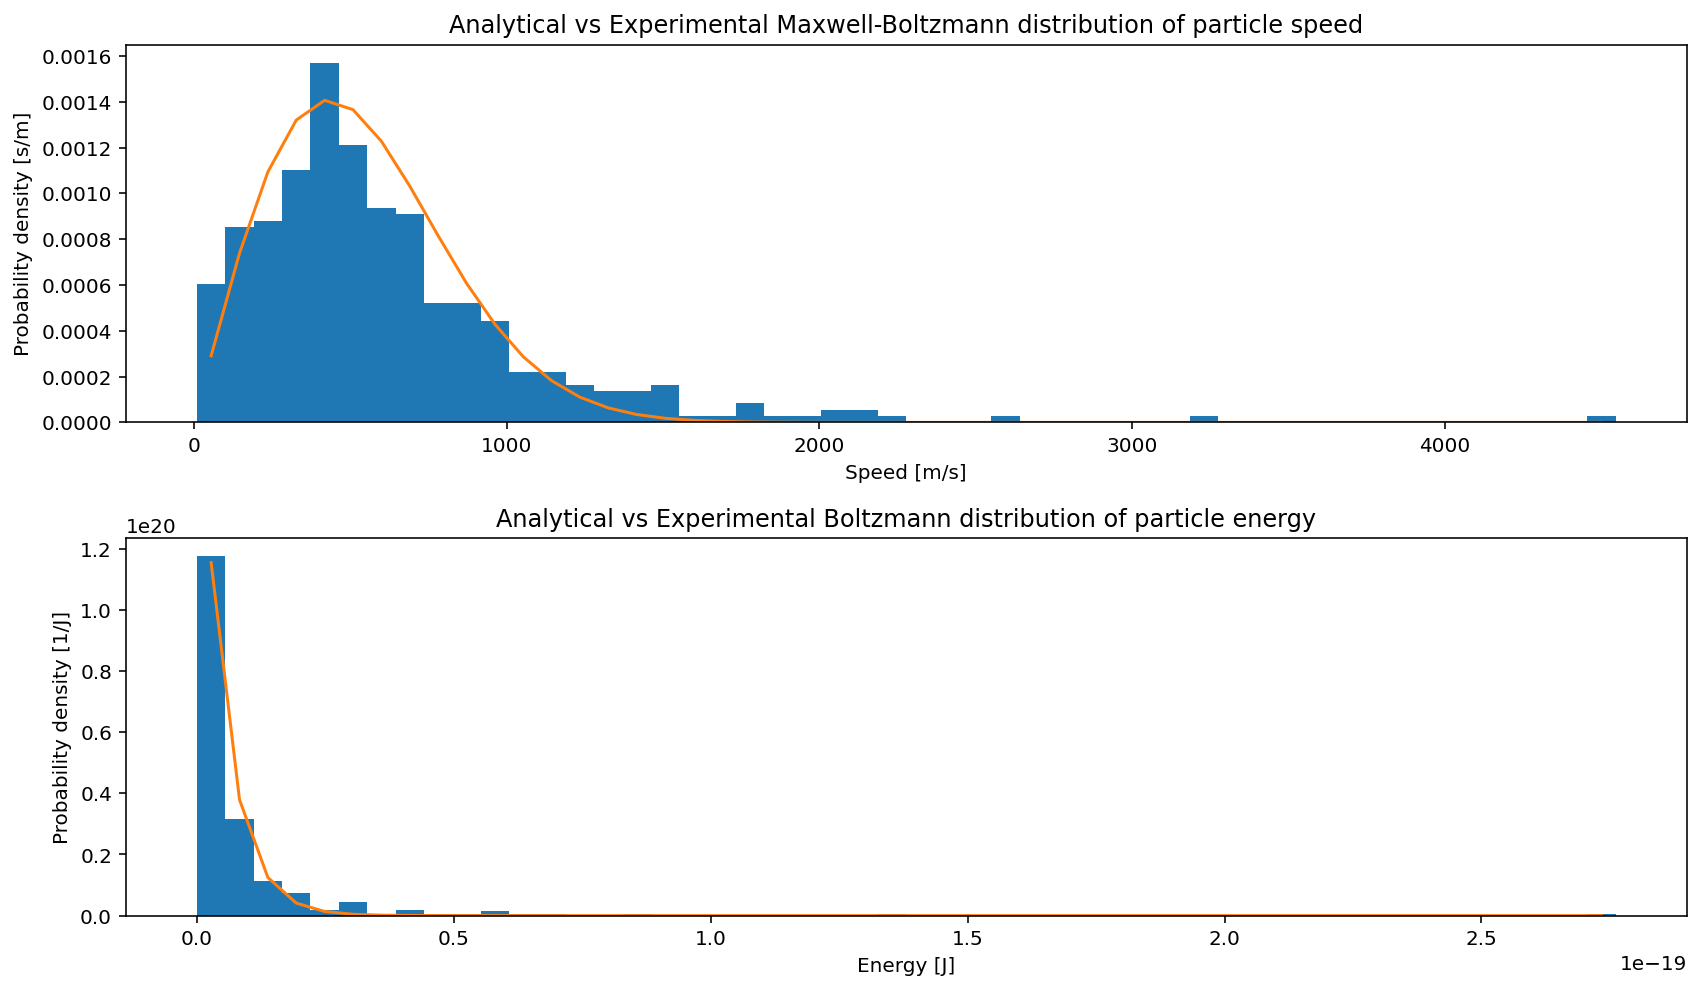

In [2]:
# Plots, fits and print temperature here
# YOUR CODE HERE
from scipy import optimize

v = np.sqrt(v_x ** 2 + v_y ** 2)
E = m*v ** 2 / 2


def f(v, T):
    """This function calculates the Maxwell-Boltzmann distribution of a
    given array of speeds, v, and the temperature of the gas, T."""
    return m*v / (k_B*T)*np.exp(-m*v ** 2 / (2*k_B*T))


def g(E, T):
    """This function calculates the Boltzmann distribution of a given array
    of energies, E, and a the temperature of the gas, T."""
    return np.exp(-E / (k_B*T)) / (k_B*T)


plt.subplot(211)
plt.title("Analytical vs Experimental Maxwell-Boltzmann distribution " +
          "of particle speed")
plt.xlabel("Speed [m/s]")
plt.ylabel("Probability density [s/m]")
n_v, bins_v, patches_v = plt.hist(v, bins=50, density=True)
avg_bins_v = (bins_v[1:] + bins_v[:-1]) / 2  # Calculates the midpoints
params = optimize.curve_fit(f, avg_bins_v, n_v, p0=200)  # fit params
plt.plot(avg_bins_v, f(avg_bins_v, params[0][0]))

plt.subplot(212)
plt.title("Analytical vs Experimental Boltzmann distribution of " +
          "particle energy")
plt.xlabel("Energy [J]")
plt.ylabel("Probability density [1/J]")
n_E, bins_E, patches_E = plt.hist(E, bins=50, density=True)
avg_bins_E = (bins_E[1:] + bins_E[:-1]) / 2  # Calculates the midpoints
plt.plot(avg_bins_E, g(avg_bins_E, params[0][0]))

plt.tight_layout()

print("The temperature of the gas is {0:.1f} K".format(params[0][0]))

# Acknowledgements
Please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook. 

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."

I would like to acknowledge ekam26@student.ubc.ca for assisting in thinking up a solution for the collision detection.

All solution code for the main project question should appear above this cell.
Project extensions should appear in the cell below.

In [3]:
# OPTIONAL project extension (which can call functions in your code above if desired) here.
# YOUR CODE HERE

# Extension Description

Please describe any new language features or project extension you have implemented in this cell.



Code executes - grader use only

YOUR ANSWER HERE

In [4]:
# pep8 returns warnings or errors
nb_name = "project4.ipynb"
cells_to_check = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']

# check_style.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-p5-1
checking cell: cell-p5-2


<Figure size 864x504 with 0 Axes>

Results Grade - grader use only

YOUR ANSWER HERE

Comments, naming, readability - grader use only

YOUR ANSWER HERE

Plots - grader use only

YOUR ANSWER HERE

Code compactness and organization - grader use only

YOUR ANSWER HERE

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Time for cell: cell-p5-1 time: 271.19
The temperature of the gas is 398.2 K


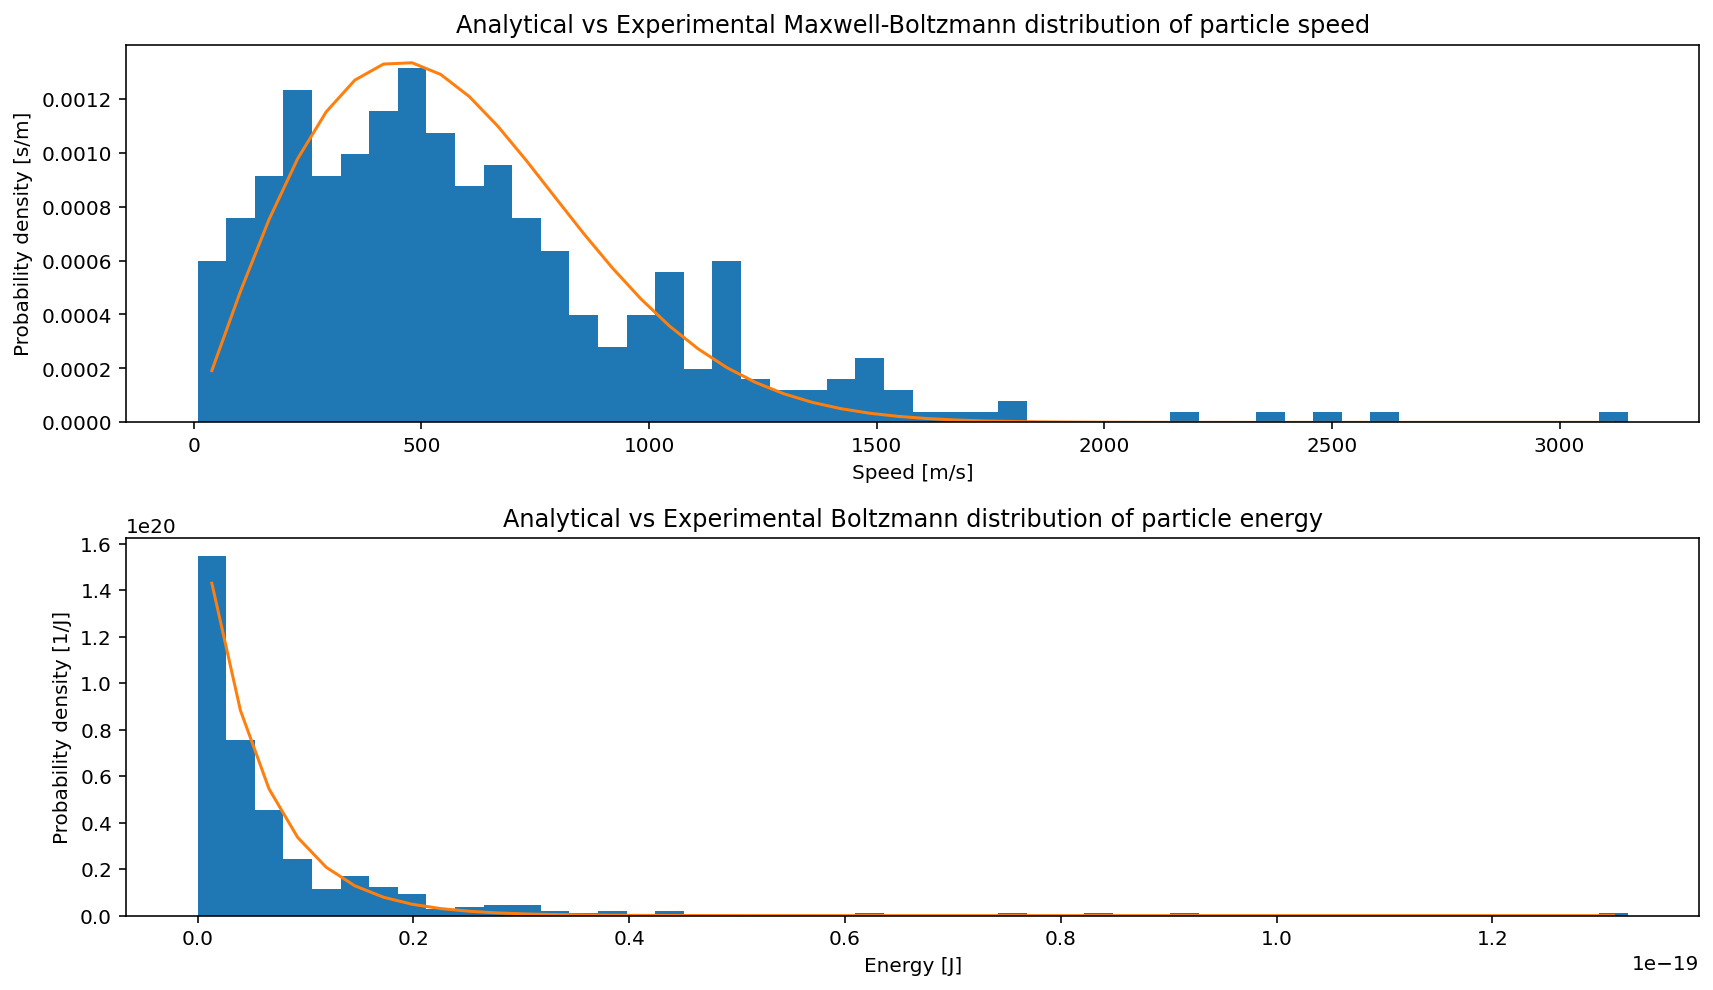

Time for cell: cell-p5-2 time: 0.80
Total time: 271.99


<Figure size 864x504 with 0 Axes>

In [5]:
# Code optimization/speed
cells_to_time = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']
# also uses nb_name
%run -i time_cells2.py

Code optimization/timing - grader use only

YOUR ANSWER HERE

New Functionality/Language features - grader use only

YOUR ANSWER HERE